In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [25]:
demo = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
demo.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


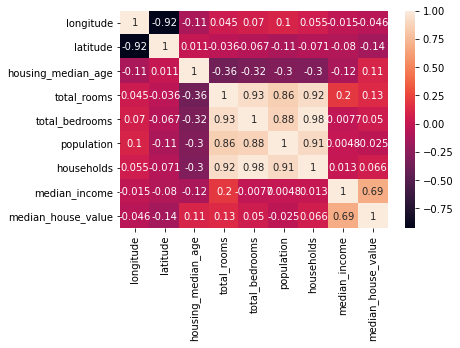

In [7]:
from matplotlib import pyplot
import seaborn as sns
sns.heatmap(demo.corr(),annot=True)

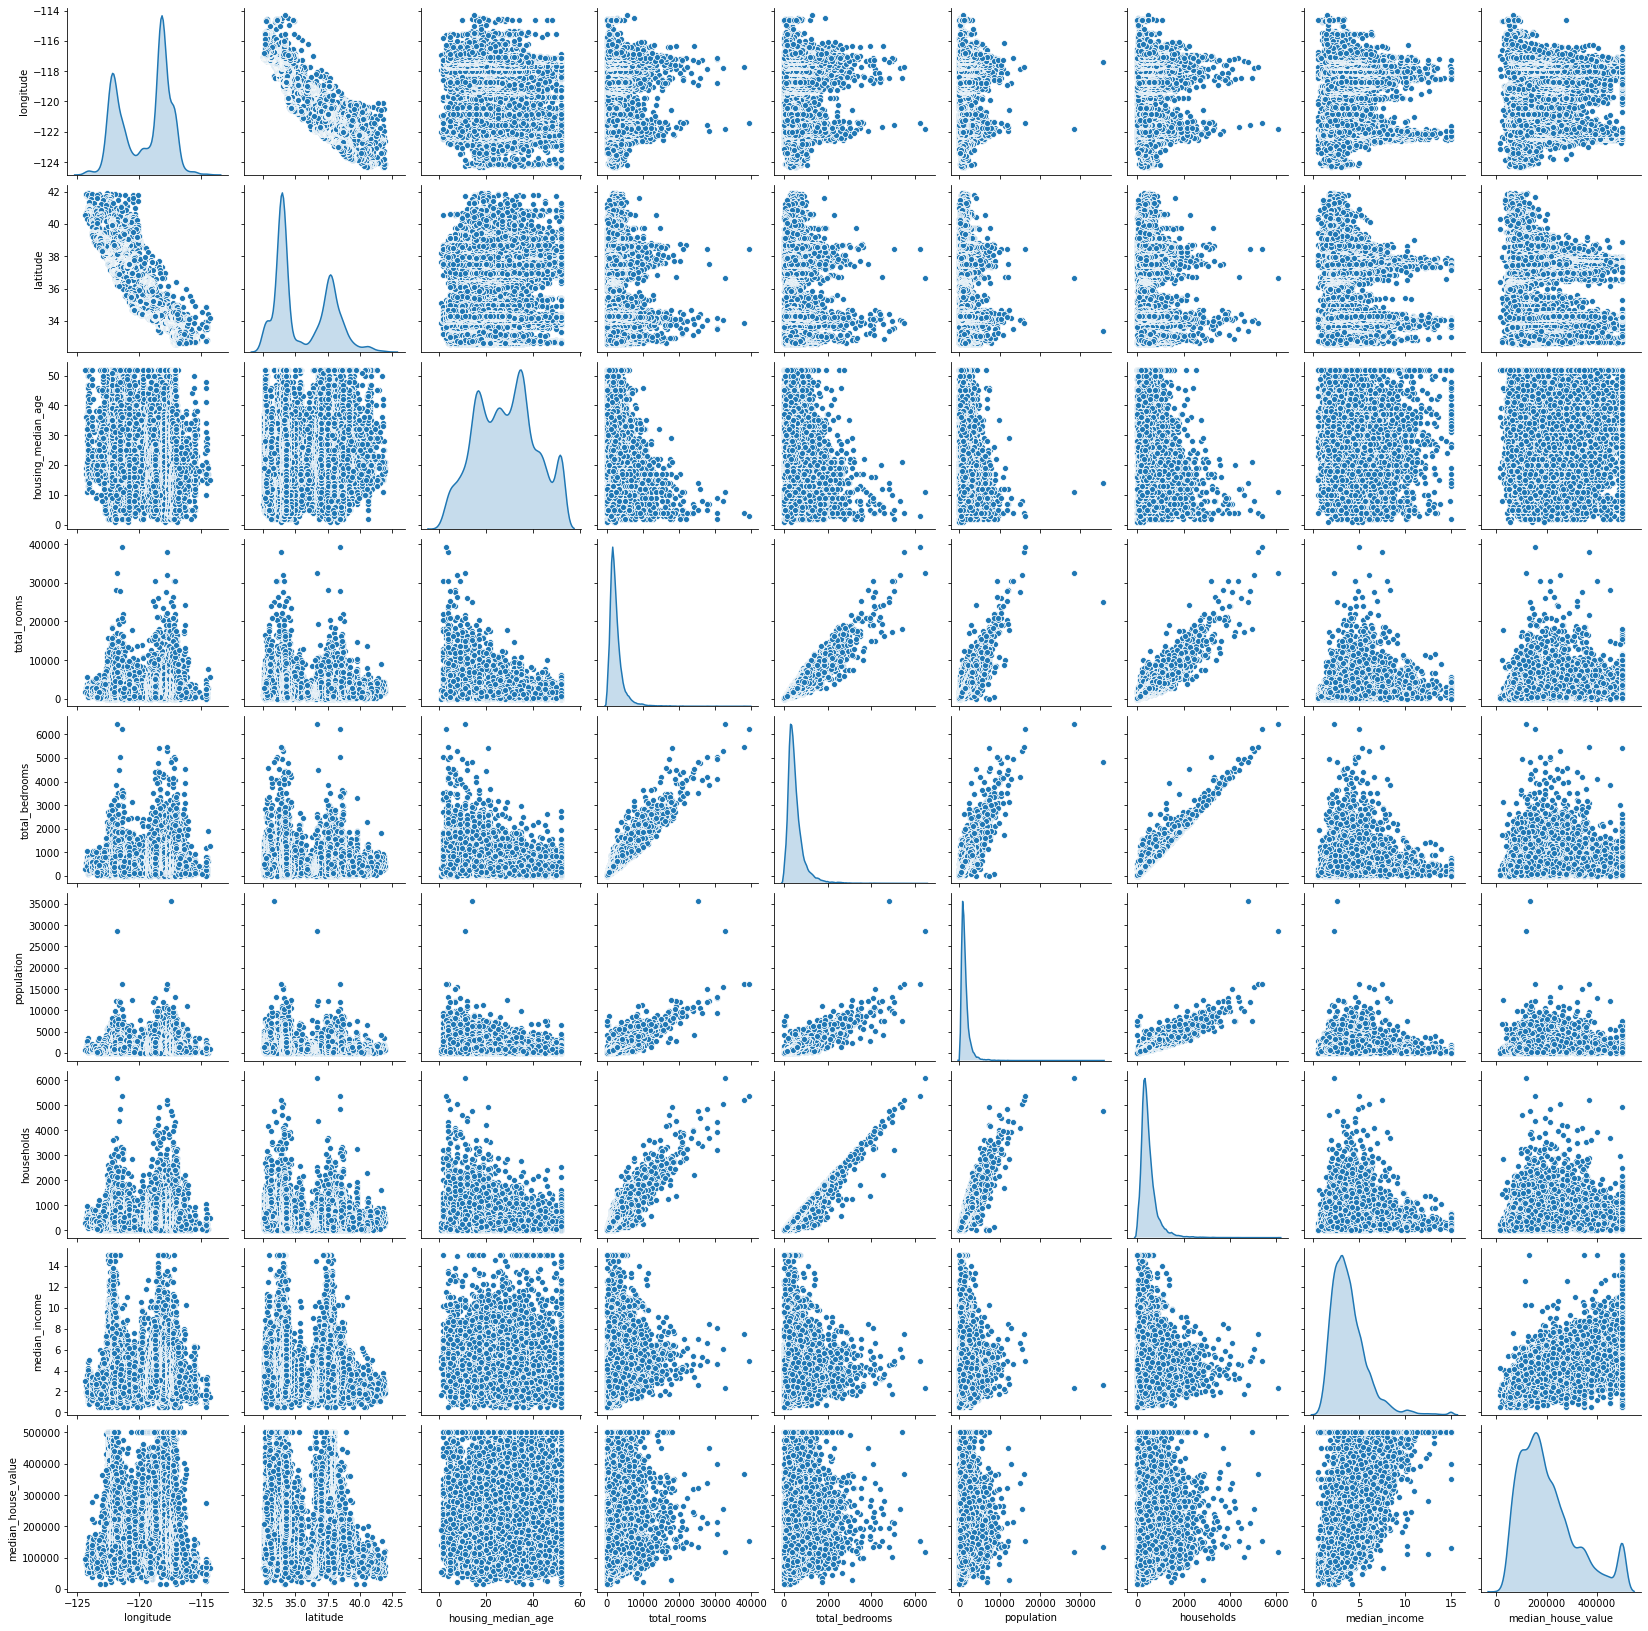

In [9]:
sns.pairplot(demo,diag_kind='kde')

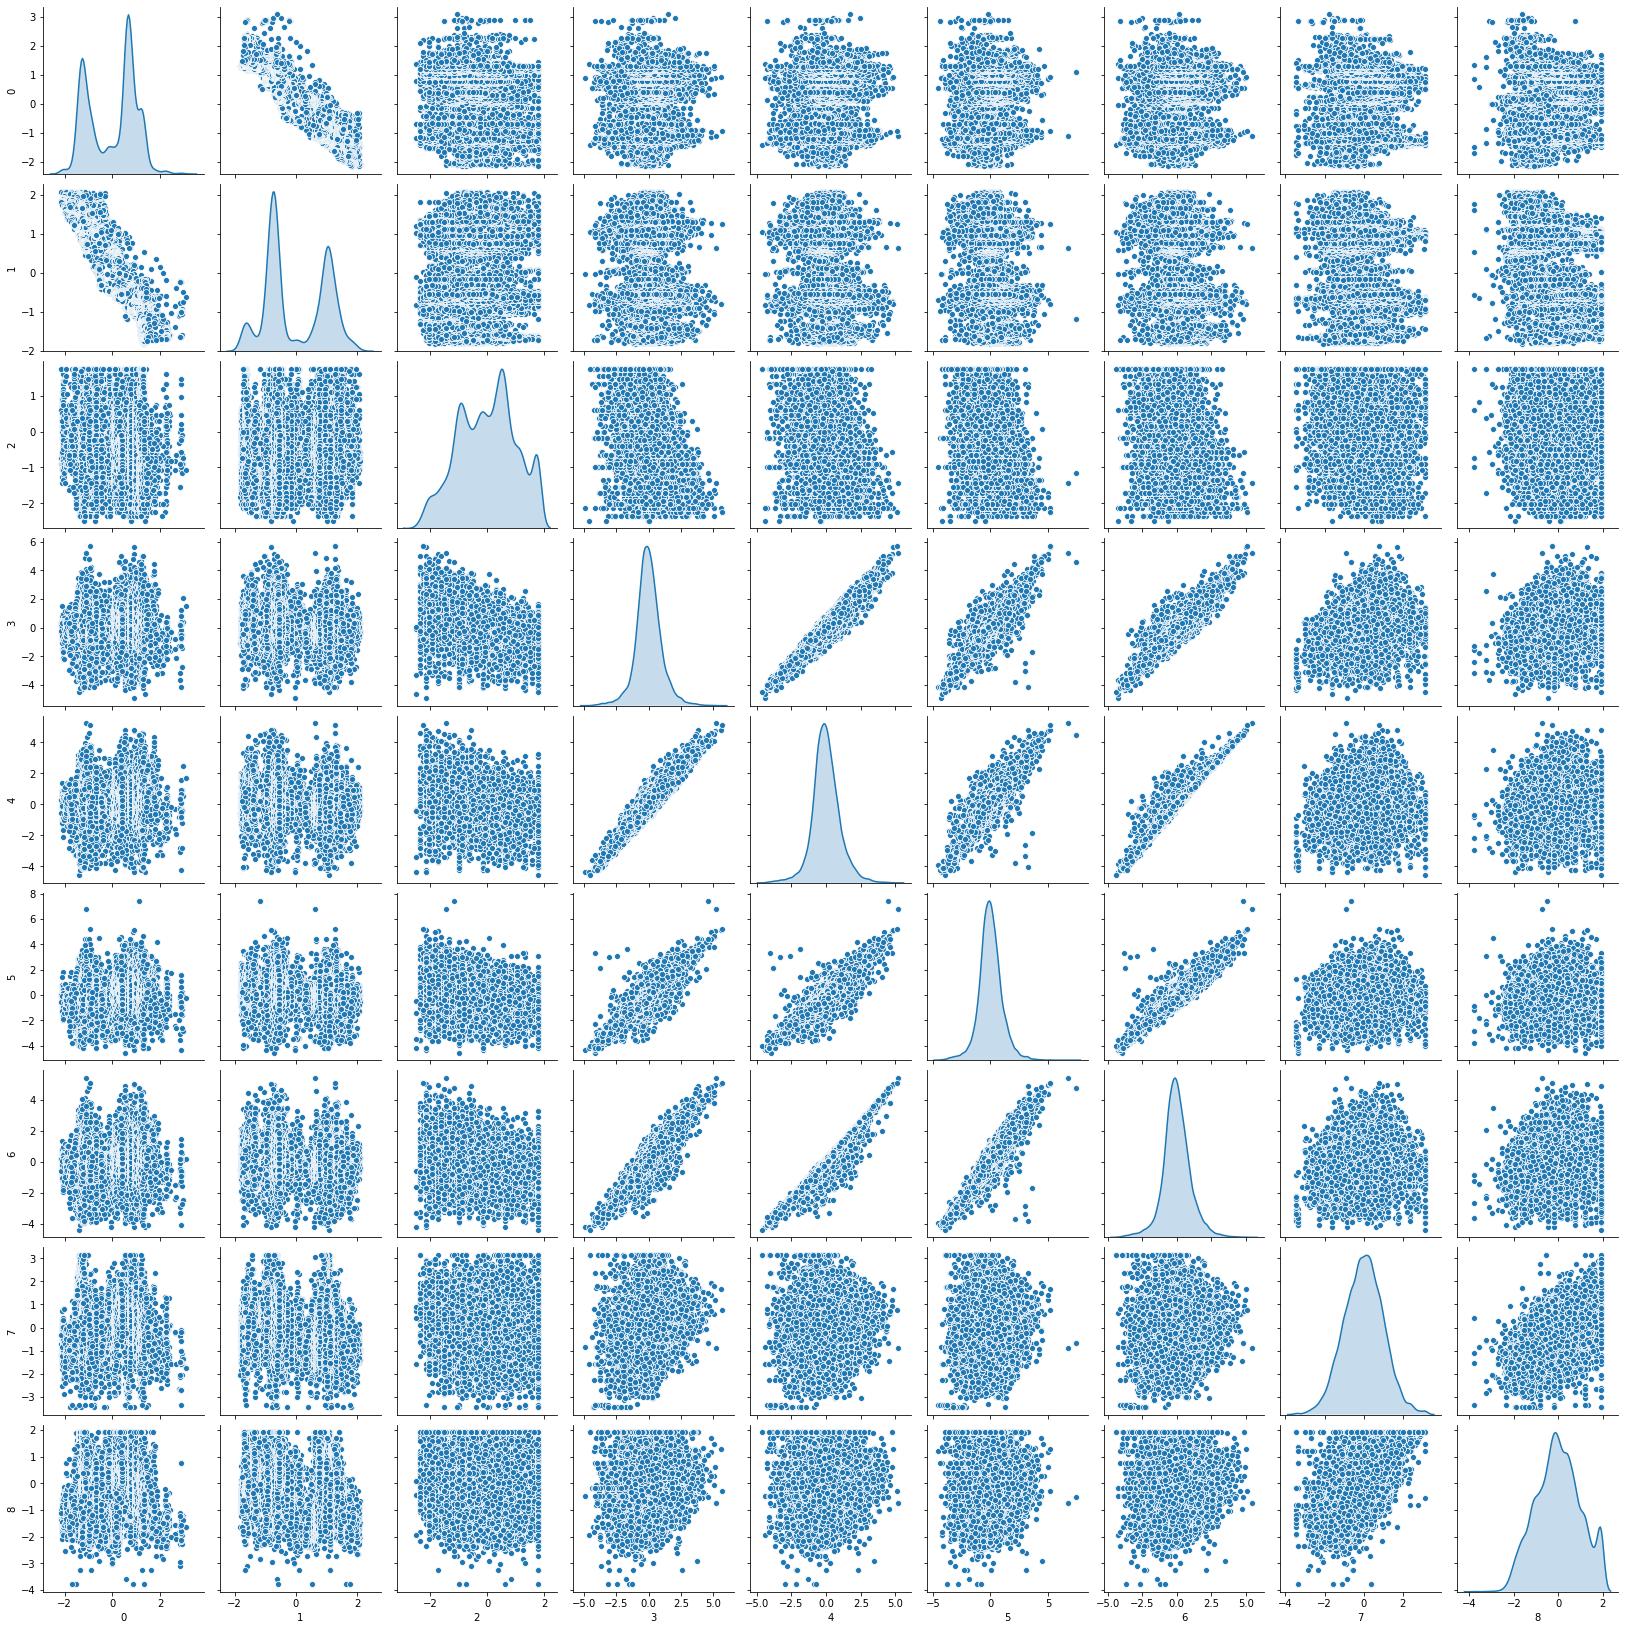

In [26]:
demo = demo.drop('ocean_proximity',axis=1)
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
powerdemo = pd.DataFrame(pt.fit_transform(demo))
sns.pairplot(powerdemo,diag_kind='kde')

In [27]:
demo = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
demo = demo.drop('ocean_proximity',axis=1)
demo = demo.drop('total_bedrooms',axis=1)
demo.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
X = demo.drop('median_house_value',axis=1)
y = demo['median_house_value']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
lr = LinearRegression()
lr.fit(Xtrain,ytrain)
print("Training R2")
print(lr.score(Xtrain,ytrain))
print("Testing R2")
print(lr.score(Xtest,ytest))

Training R2
0.631901171165306
Testing R2
0.6332524133181049


In [84]:
lr = DecisionTreeRegressor(max_depth=11)
lr.fit(Xtrain,ytrain)
print("Training R2")
print(lr.score(Xtrain,ytrain))
print("Testing R2")
print(lr.score(Xtest,ytest))

Training R2
0.8631125477155788
Testing R2
0.7226285523079597


In [77]:
from xgboost import XGBRegressor
lr = XGBRegressor()
lr.fit(Xtrain,ytrain)
print("Training R2")
print(lr.score(Xtrain,ytrain))
print("Testing R2")
print(lr.score(Xtest,ytest))

Training R2
0.9318716037635799
Testing R2
0.8293451239270063


Linear Regression: 0.538088 (0.060098)
Decision Tree Regression: 0.229824 (0.336991)
XGBoost Regression: 0.600595 (0.176683)


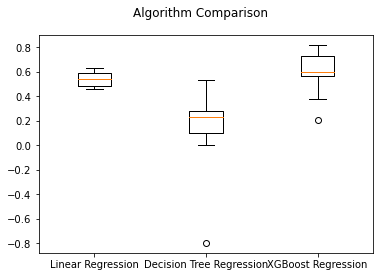

In [81]:
import warnings
from matplotlib import pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn import model_selection
lr = LinearRegression()
dt = DecisionTreeRegressor()
xb = XGBRegressor(n_estimators=200)
models = []
models.append(('Linear Regression',lr))
models.append(('Decision Tree Regression',dt))
models.append(('XGBoost Regression',xb))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,random_state=10)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.median(cv_results), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [82]:
results

[array([0.52456976, 0.63366022, 0.47744501, 0.56350859, 0.60040482,
        0.55160613, 0.46363325, 0.46167694, 0.51351032, 0.61872484]),
 array([-7.97624481e-01,  2.00572932e-01,  2.77973510e-01,  2.71051559e-01,
         5.35458197e-01,  1.71443152e-01,  7.75835472e-02,  2.59075480e-01,
        -7.17371090e-04,  2.90569549e-01]),
 array([0.20486271, 0.81631519, 0.75508387, 0.61249795, 0.7767201 ,
        0.58487411, 0.56010685, 0.58869275, 0.37464752, 0.64220466])]

In [93]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.decomposition import PCA
pipe = Pipeline((
("poly",PolynomialFeatures(degree=3)),
("pt",PowerTransformer()),
("sc",StandardScaler()),
("pca",PCA()),    
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))

Training R2
0.7452518603301208
Testing R2
0.6919028119213896
